# Youtube URL study

## Import

In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../4_URL_study')
import url_util as ut
sys.path.insert(0, '../')
import general_utils as gen_ut

## Dataset preparation

In [2]:
df_yt_complete = pd.read_csv('../4_URL_study/Youtube_URL.csv',low_memory=False)
df_yt_complete = df_yt_complete.groupby('url').first().sort_values(by='occurrency',ascending=False)
df_yt_complete.head()

,title,description,type,available,reason,occurrency
url,,,,,,
https://www.youtube.com/watch?v=U-kC9XkT7Eo,I LOCKDOWNS: DISTRUGGERANNO PIU' VITE DI QUANT...,Intervista all'epidemiologa di punta della Har...,decompressed,True,Parsed,508
https://www.youtube.com/watch?v=xgfQfDh4puk,"DAL TOP DI HARVARD, LE INCOGNITE DI CoV-2, IMM...",David R. Walt della Harvard University Medical...,decompressed,True,Parsed,346
https://www.youtube.com/watch?v=-BbnIlxaqJM,VACCINI OBBLIGATORI AGGRAVEREBBERO LA SITUAZIO...,ISCRIVITI AL NOSTRO CANALE YOUTUBE: https://bi...,decompressed,True,Parsed,265
https://youtu.be/kHGtn_vnrJ8,IL PARERE DEL PREMIO NOBEL LUC MONTAGNIER SULL...,- Vi farete vaccinare oggi contro il #Covid?\n...,compressed,True,Parsed,192
https://youtu.be/GJrC0xAAXoU,VACCINO: i dubbi più grossi,Ho cercato di fare da tramite tra gli enti per...,compressed,True,Parsed,165


In [ ]:
df = pd.read_csv('../Tweets.csv',low_memory=False,usecols=['user_screen_name','urls'])
df.head()

In [ ]:
data = pd.read_csv('../1_Dataset_preparation/listControlledUsers.csv')  
listNovax = list(data[data['malicious']].iloc[:,0])
listProvax = list(data[data['benevolent']].iloc[:,0])

In [5]:
df_novax = df[np.in1d(df['user_screen_name'], listNovax)].copy()
df_provax = df[np.in1d(df['user_screen_name'], listProvax)].copy()

## General info about the video shared

In [6]:
df_yt_summary = df_yt_complete.groupby(['reason']).count()
df_yt_summary

,title,description,type,available,occurrency
reason,,,,,
Error 404,0,0,4,4,4
Parsed,4856,4347,4857,4857,4857
Playlist,0,0,2,2,2
Profile,0,0,44,44,44
Unavailable,0,0,1729,1729,1729


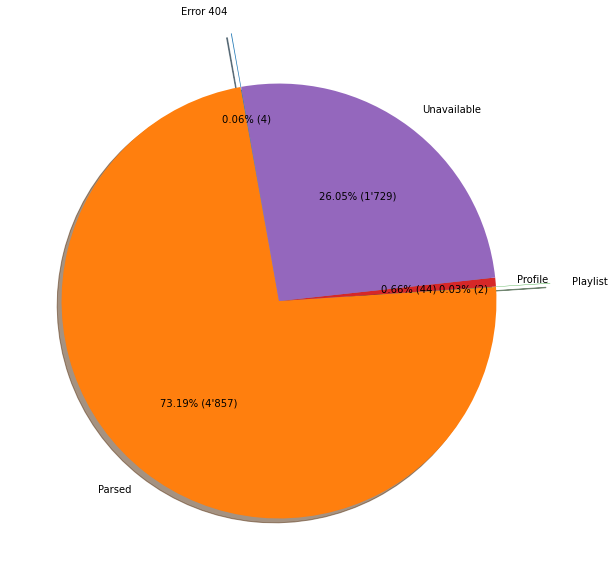

In [7]:
plt.figure(figsize=(20,10))
s = df_yt_summary['occurrency'].sum()
plt.pie(df_yt_summary['occurrency'], labels=df_yt_summary.index, shadow=True, startangle=100,
       autopct=lambda p:f'{p:.2f}% ({p*(s)/100 :,.0f})'.replace(',', '\''),
       explode = [0.25,0.0,0.25,0.0,0.0])
plt.show()

In [8]:
df_yt = df_yt_complete[np.logical_or(df_yt_complete['reason']=='Parsed' , df_yt_complete['reason']=='Unavailable')]
df_yt

,title,description,type,available,reason,occurrency
url,,,,,,
https://www.youtube.com/watch?v=U-kC9XkT7Eo,I LOCKDOWNS: DISTRUGGERANNO PIU' VITE DI QUANT...,Intervista all'epidemiologa di punta della Har...,decompressed,True,Parsed,508
https://www.youtube.com/watch?v=xgfQfDh4puk,"DAL TOP DI HARVARD, LE INCOGNITE DI CoV-2, IMM...",David R. Walt della Harvard University Medical...,decompressed,True,Parsed,346
https://www.youtube.com/watch?v=-BbnIlxaqJM,VACCINI OBBLIGATORI AGGRAVEREBBERO LA SITUAZIO...,ISCRIVITI AL NOSTRO CANALE YOUTUBE: https://bi...,decompressed,True,Parsed,265
https://youtu.be/kHGtn_vnrJ8,IL PARERE DEL PREMIO NOBEL LUC MONTAGNIER SULL...,- Vi farete vaccinare oggi contro il #Covid?\n...,compressed,True,Parsed,192
https://youtu.be/GJrC0xAAXoU,VACCINO: i dubbi più grossi,Ho cercato di fare da tramite tra gli enti per...,compressed,True,Parsed,165
...,...,...,...,...,...,...
https://youtu.be/Ag-wQZvvXkQ,Vaccino per le Granfondo ?,Vaccino per le Granfondo ?\n➡️Link intervista ...,compressed,True,Parsed,1
https://youtu.be/Afnq33Ht2O8,"VacciNation, sottotitolato in italiano","La storia di Alan Yurko, condannato ingiustame...",compressed,True,Parsed,1
https://youtu.be/AdFUDl4NOSo,None,None,compressed,False,Unavailable,1


## Tracking user with type youtbe video shared
Done only for unavailbe and parsed video

### Novax users

In [9]:
df_url_novax = df_novax[df_novax['urls'] != '[]'].copy()

df_url_novax = ut.get_dfYt_line(df_url_novax,df_yt.index)
df_url_novax = df_url_novax[df_url_novax['yt']]

df_url_novax

,user_screen_name,urls,yt
1141,IacobellisT,"[{'url': 'https://t.co/otlx8DwhOC', 'expanded_...",True
1157,IacobellisT,"[{'url': 'https://t.co/bZtBeHU1OQ', 'expanded_...",True
1171,TommyBrain,"[{'url': 'https://t.co/Ok58cRZkSK', 'expanded_...",True
1175,IacobellisT,"[{'url': 'https://t.co/I6mZ530RLx', 'expanded_...",True
1178,TommyBrain,"[{'url': 'https://t.co/lzU0X81GEG', 'expanded_...",True
...,...,...,...
4041365,EliseiNicole,"[{'url': 'https://t.co/HiR74ZmWST', 'expanded_...",True
4043595,Mariang47614228,"[{'url': 'https://t.co/SoYAmhghxw', 'expanded_...",True
4048194,TommyBrain,"[{'url': 'https://t.co/4FlUHFjrwD', 'expanded_...",True
4048578,Bluefidel47,"[{'url': 'https://t.co/556qwqyDJW', 'expanded_...",True


In [10]:
df_user_novax_yt = pd.DataFrame(columns=['name','url','type'])

for i in df_url_novax.index:
    user = df_novax.at[i, 'user_screen_name']
    s = df_novax.at[i, 'urls']
    urls = gen_ut.get_string_json(s, 'expanded_url')
    for url in urls:
        if url in df_yt.index:
            df_user_novax_yt.loc[df_user_novax_yt.shape[0]] = [user,url,df_yt.loc[url,'reason']]
            

df_user_novax_yt        

,name,url,type
0,IacobellisT,https://www.youtube.com/watch?v=xgfQfDh4puk,Parsed
1,IacobellisT,https://www.youtube.com/watch?v=dSs1RSBqVnY,Parsed
2,TommyBrain,https://www.youtube.com/watch?v=U-kC9XkT7Eo,Parsed
3,IacobellisT,https://www.youtube.com/watch?v=U-kC9XkT7Eo,Parsed
4,TommyBrain,https://www.youtube.com/watch?v=xgfQfDh4puk,Parsed
...,...,...,...
3920,EliseiNicole,https://youtu.be/HQY_XkFOsSA,Parsed
3921,Mariang47614228,https://youtu.be/_1KsDNQWrgU,Unavailable
3922,TommyBrain,https://www.youtube.com/watch?v=rzYk7-RoTow,Parsed
3923,Bluefidel47,https://youtu.be/Fck6ZwNiq-w,Parsed


In [11]:
df_user_novax_yt['total'] = 1
df_user_novax_yt['isParsed'] = 0
df_user_novax_yt.loc[df_user_novax_yt['type']=='Parsed','isParsed'] = 1


df_user_novax_group = df_user_novax_yt.groupby(['name']).sum().sort_values(['total'],ascending=False)

Text(0.5, 1.0, 'Number of youtube video shared (malicious)')

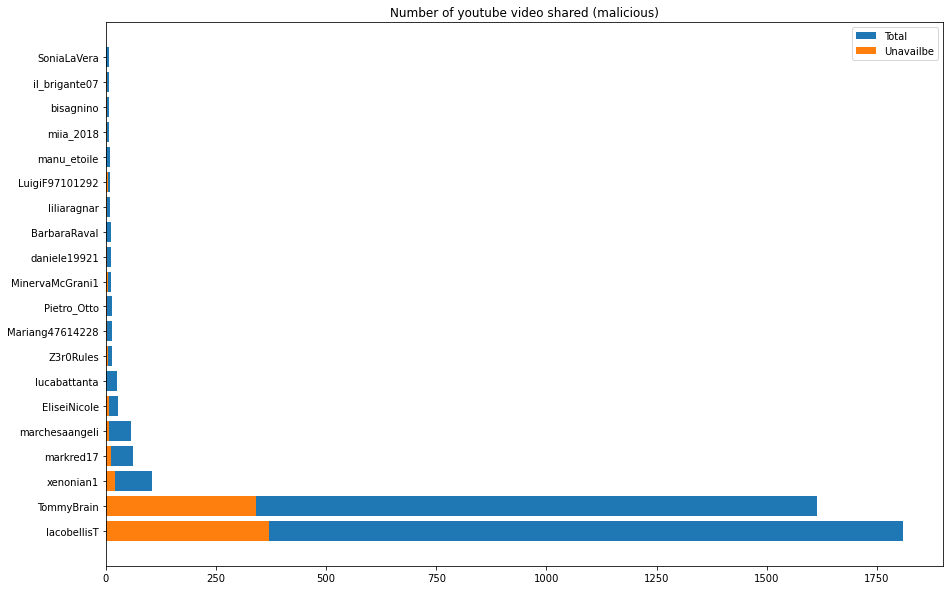

In [12]:
plt.figure(figsize=(15,10))
plt.barh(df_user_novax_group.head(20).index,df_user_novax_group.head(20).total,label='Total')
plt.barh(df_user_novax_group.head(20).index,df_user_novax_group.head(20).total-df_user_novax_group.head(20).isParsed
        ,label='Unavailbe')
plt.legend()
plt.title('Number of youtube video shared (malicious)')

### Provax users

In [13]:
df_url_provax = df_provax[df_provax['urls'] != '[]'].copy()

df_url_provax = ut.get_dfYt_line(df_url_provax,df_yt.index)
df_url_provax = df_url_provax[df_url_provax['yt']]

df_url_provax

,user_screen_name,urls,yt
230246,bgallavotti,"[{'url': 'https://t.co/8dAA3ZWgwr', 'expanded_...",True
549401,Aifa_ufficiale,"[{'url': 'https://t.co/cFzPSMYUgW', 'expanded_...",True
550922,Aifa_ufficiale,"[{'url': 'https://t.co/cFzPSMYUgW', 'expanded_...",True
553767,Aifa_ufficiale,"[{'url': 'https://t.co/cFzPSMYUgW', 'expanded_...",True
1047612,GiacomoGorini,"[{'url': 'https://t.co/fSLi3FULBx', 'expanded_...",True
1214242,ISSalute_it,"[{'url': 'https://t.co/PXbcsJK7f5', 'expanded_...",True
1256573,RobertoBurioni,"[{'url': 'https://t.co/Qiiqryc6k1', 'expanded_...",True
1345375,istsupsan,"[{'url': 'https://t.co/LtQuEVDcJw', 'expanded_...",True
1504998,BiologiScienza,"[{'url': 'https://t.co/SxzJwJpljG', 'expanded_...",True
1668830,GIMBE,"[{'url': 'https://t.co/Txv5bZWHZK', 'expanded_...",True


In [14]:
df_user_provax_yt = pd.DataFrame(columns=['name','url','type'])

for i in df_url_provax.index:
    user = df_provax.at[i, 'user_screen_name']
    s = df_provax.at[i, 'urls']
    urls = gen_ut.get_string_json(s, 'expanded_url')
    for url in urls:
        if url in df_yt.index:
            df_user_provax_yt.loc[df_user_provax_yt.shape[0]] = [user,url,df_yt.loc[url,'reason']]        

In [15]:
df_user_provax_yt['total'] = 1
df_user_provax_yt['isParsed'] = 0
df_user_provax_yt.loc[df_user_provax_yt['type']=='Parsed','isParsed'] = 1


df_user_provax_group = df_user_provax_yt.groupby(['name']).sum().sort_values(['total'],ascending=False)
df_user_provax_group

,total,isParsed
name,,
Aifa_ufficiale,4,4
Cartabellotta,3,1
bgallavotti,3,3
BiologiScienza,2,2
GIMBE,2,1
MinisteroSalute,2,2
RobertoBurioni,2,2
antonellaviol17,2,2
GiacomoGorini,1,1


Text(0.5, 1.0, 'Number of youtube video shared (benevolent)')

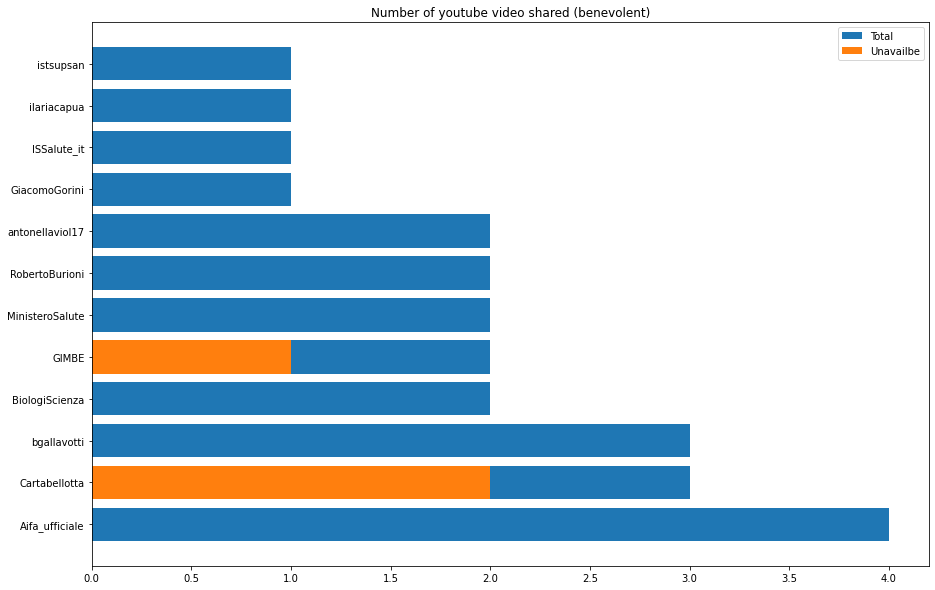

In [16]:
plt.figure(figsize=(15,10))
plt.barh(df_user_provax_group.head(20).index,df_user_provax_group.head(20).total,label='Total')
plt.barh(df_user_provax_group.head(20).index,df_user_provax_group.head(20).total-df_user_provax_group.head(20).isParsed
        ,label='Unavailbe')
plt.legend()
plt.title('Number of youtube video shared (benevolent)')